<a href="https://colab.research.google.com/github/Vaelastraszz/Stack_OF/blob/master/Supervised_Tags_Creation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from google.colab import drive

drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
raw_post = pd.read_csv("/content/gdrive/My Drive/Stack_OF/QueryResults2.csv")

In [0]:
pd.options.display.max_columns = None

In [0]:
raw_post.head()

,Id,PostTypeId,AcceptedAnswerId,ParentId,CreationDate,DeletionDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,LastEditorDisplayName,LastEditDate,LastActivityDate,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate,CommunityOwnedDate,Clean_tags
0,4,1,7.0,NaN,2008-07-31 21:42:52,NaN,605,39404,<p>I want to use a track-bar to change a form'...,8.0,NaN,6786713.0,Rich B,2018-07-02 17:55:27,2019-01-17 13:39:48,Convert Decimal to Double?,<c#><floating-point><type-conversion><double><...,13,2,46.0,NaN,2012-10-31 16:42:47,c# floating-point type-conversion double decimal
1,6,1,31.0,NaN,2008-07-31 22:08:08,NaN,275,17431,<p>I have an absolutely positioned <code>div</...,9.0,NaN,63550.0,Rich B,2016-03-19 06:05:48,2018-12-15 03:57:18,Percentage width child element in absolutely p...,<html><css><css3><internet-explorer-7>,6,0,10.0,NaN,NaN,html css internet-explorer-7
2,9,1,1404.0,NaN,2008-07-31 23:40:59,NaN,1743,524070,<p>Given a <code>DateTime</code> representing ...,1.0,NaN,3956566.0,Rich B,2018-04-21 17:48:14,2018-07-25 11:57:14,How do I calculate someone's age in C#?,<c#><.net><datetime>,63,7,421.0,NaN,2011-08-16 19:40:43,c# .net datetime
3,11,1,1248.0,NaN,2008-07-31 23:55:37,NaN,1417,143604,<p>Given a specific <code>DateTime</code> valu...,1.0,NaN,6479704.0,user2370523,2017-06-04 15:51:19,2019-01-03 08:03:07,Calculate relative time in C#,<c#><datetime><time><datediff><relative-time-s...,36,3,536.0,NaN,2009-09-04 13:15:59,c# datetime time datediff
4,13,1,NaN,NaN,2008-08-01 00:42:38,NaN,568,166386,<p>Is there a standard way for a web server to...,9.0,NaN,9752662.0,Rich B,2018-12-24 22:47:42,2019-02-25 18:10:55,Determine a user's timezone,<html><browser><timezone><user-agent><timezone...,24,10,144.0,NaN,NaN,html browser timezone user-agent


In [0]:
raw_post.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40819 entries, 0 to 40818
Data columns (total 22 columns):
Id                       40819 non-null int64
PostTypeId               40819 non-null int64
AcceptedAnswerId         31375 non-null float64
ParentId                 0 non-null float64
CreationDate             40819 non-null object
DeletionDate             0 non-null float64
Score                    40819 non-null int64
ViewCount                40819 non-null int64
Body                     40819 non-null object
OwnerUserId              37255 non-null float64
OwnerDisplayName         36055 non-null object
LastEditorUserId         29045 non-null float64
LastEditorDisplayName    20716 non-null object
LastEditDate             29615 non-null object
LastActivityDate         40819 non-null object
Title                    40819 non-null object
Tags                     40819 non-null object
AnswerCount              40819 non-null int64
CommentCount             40819 non-null int64
Favorit

In [4]:
duplicates = raw_post[raw_post.Body.map(raw_post.Body.value_counts() > 1)]
duplicates.sort_values('Body')[['Body', 'Title']]

,Body,Title
17113,<p>Anyone have any idea? And any open source s...,How to check the overall health of database us...
17114,<p>Anyone have any idea? And any open source s...,Monitor SQL currently in shared pool using Toad
17115,<p>Anyone have any idea? And any open source s...,Monitoring a database instance
17118,<p>Anyone have any idea? And any open source s...,How to use SQLab Xpert Tuning to tune SQL for ...
10253,<p>Could somebody please name a few. I could ...,Advantages of VS 2008 over VS 2005
10254,<p>Could somebody please name a few. I could ...,Benefits of SQL Server 2005 over 2000
30089,<p>How can I turn off the wavy red underlines ...,Netbeans - Turn off - wavy red underlines - How?
30186,<p>How can I turn off the wavy red underlines ...,Netbeans 6.1 (!5.5.1) - Turn off - wavy red un...
31152,<p>I am attempting to deploy an ASP.NET 2.0 We...,Need help configuring IIS to serve 2.0 web ser...
31155,<p>I am attempting to deploy an ASP.NET 2.0 We...,Need help configuring IIS to serve 2.0 web ser...


In [0]:
 raw_post.drop_duplicates(['Body', 'Title'],inplace=True)

In [0]:
raw_post.shape

(40818, 22)

In [0]:
import pickle

tf_idf = pickle.load(open('/content/gdrive/My Drive/Stack_OF/tf_idf.pkl','rb'))

# Analyse des tags 

<h3> Nettoyage des tags </h3>

In [0]:
import re

def purge_tags(v):
    regex = re.findall(r'\<(.*?)\>',v)
    new_tags = " ".join(x for x in regex)
    
    return new_tags

In [0]:
raw_post['Tags_f'] = raw_post.Tags
raw_post['Tags_f'] = raw_post["Tags_f"].apply(purge_tags)

<h3> Nombre de tags </h3>

In [0]:
import nltk

In [0]:
liste_tags = raw_post.Tags_f.str.split().tolist()

In [0]:
def freq_list(liste):
    freq =  nltk.FreqDist()
    
    for i in range(len(liste_tags)):
        
        freq+= nltk.FreqDist([x for x in liste_tags[i]])
        
    return freq

In [0]:
freq = freq_list(liste_tags)

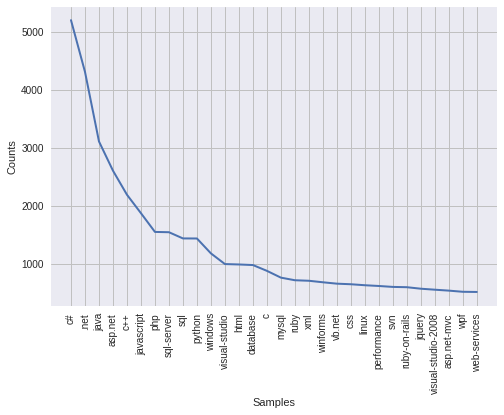

In [0]:
freq.plot(30)

On peut voir sur ce graphe qu'il y a des tags qui sont beaucoup plus utilisés que d'autres on peyt donc supposer que si on augmente encore plus le nombre de tags dans le graphe que certains tags seront présents un nombre de fois très faible, on verra donc par la suite garder un nb de tags qui représentent une grande partie des questions sans avoir à garder tous les tags sur lesquels le modèle aurait peu d'exemple

In [0]:
freq.B()

8384

On a donc 8384 tags possibles sur tous les posts qu'on a extrait

In [0]:
def get_max_tags(liste):
    
    maxi = len(liste[0])
    
    for i in range(len(liste)):
        
        if len(liste[i]) > maxi:
            
            maxi = len(liste[i])
    
    return maxi

In [0]:
def get_min_tags(liste):
    
    mini = len(liste[0])
    
    for i in range(len(liste)):
        
        if len(liste[i]) < mini:
          
            mini = len(liste[i])
        
    return mini

In [0]:
def tags_nb_list(liste):
    
    array_tags = np.ones(len(liste))
    
    for i in range(len(liste)):
        
        array_tags[i] = len(liste[i])
    
    return array_tags

In [0]:
sum(freq.values())

119062

In [0]:
get_max_tags(liste_tags)

6

In [0]:
get_min_tags(liste_tags)

1

In [0]:
tags_array=tags_nb_list(liste_tags)

In [0]:
pd.DataFrame({"nb_tags":tags_array}).groupby(["nb_tags"]).size()

nb_tags
1.0     4123
2.0    11359
3.0    13118
4.0     8230
5.0     3981
6.0        7
dtype: int64

<h3> Récupération des tags utiles </h3>

In [0]:
dict_tags = dict(freq.most_common(freq.B()))

In [0]:
dict_tags

In [0]:
def calcul_explanation(dict_tags):
    
    nb=0
    iteration = 0
    
    for key in dict_tags:
        
        nb += dict_tags[key]
        iteration = iteration + 1
        
        if nb / sum(freq.values()) * 100 > 90:
            
            nb_words = iteration
            break
    
    return nb_words

In [0]:
calcul_explanation(dict_tags)

1907

In [0]:
def useful_tags(dict_tags):
     
    useful_set = []
    iteration = 0
    threshold = calcul_explanation(dict_tags)
    
    for key in dict_tags:
        
        useful_set.append(key)
        iteration = iteration + 1
        
        if iteration + 1 > 80 :
            break
    
    
    return set(useful_set)

In [0]:
useful_list = []
full_set = useful_tags(dict_tags)

for i in range(len(liste_tags)):
        useful_list.append([x for x in liste_tags[i] if x in full_set])
    

<h3> Ajout des tags utiles au dataframe de base </h3>

In [0]:
nltk.download('perluniprops')

[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Unzipping misc/perluniprops.zip.


True

In [0]:
post = raw_post

In [0]:
from nltk.tokenize.moses import MosesDetokenizer

detokenizer = MosesDetokenizer()

post["Clean_tags"] = pd.DataFrame([detokenizer.detokenize(x, return_str=True) for x in useful_list])

<h2> Preprocessing avant modélisation </h2>

In [0]:
from sklearn.preprocessing import MultiLabelBinarizer

In [0]:
def clean_tf_idf(tf_idf):
    
    ids_empty = post.index[post.Clean_tags==""].values 
    tf_idf_arr = tf_idf.toarray()
    
    new_tf = np.delete(tf_idf_arr, ids_empty, axis=0)
   
    return new_tf

In [0]:
X = clean_tf_idf(tf_idf)

In [0]:
post = post[raw_post.Clean_tags!=""]

In [0]:
y = post['Clean_tags'].str.get_dummies(sep=' ')

<h3> Pre Processing bis </h3>

In [18]:
mlb = MultiLabelBinarizer()
mlb.fit_transform(useful_list).shape

(40818, 80)

In [0]:
y2 = mlb.fit_transform(useful_list)

<h2> Modélisation </h2>

In [0]:
from sklearn import model_selection

X_train, X_test, y_train, y_test = model_selection.train_test_split(tf_idf,y2,test_size = 0.3,random_state = 0)

In [0]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report


<h3> Trial with Logistic Regression </h3>

In [22]:
lr = LogisticRegression()
#params = {'estimator__C': np.logspace(-3, 3, 7) , 'estimator__penalty':['l1','l2'] }

ovr_clf = OneVsRestClassifier(lr, n_jobs=-1)

#model = GridSearchCV(ovr_clf,params, scoring = 'f1_micro', cv=5,n_jobs=-1)
ovr_clf.fit(X_train, y_train)

#print(model.best_params_)

OneVsRestClassifier(estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=-1)

In [23]:
y_pred=ovr_clf.predict(X_test)
f1_score(y_test, y_pred, average='micro')

0.4803560076287349

In [24]:
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

                    precision    recall  f1-score   support

              .net       0.73      0.24      0.36      1269
          .net-3.5       0.00      0.00      0.00        65
    actionscript-3       0.43      0.05      0.09        61
              ajax       0.61      0.23      0.34       116
         algorithm       0.66      0.17      0.27       135
            apache       0.81      0.30      0.44        83
            arrays       0.63      0.36      0.46        67
           asp.net       0.82      0.44      0.57       759
       asp.net-mvc       0.89      0.50      0.64       150
                 c       0.56      0.05      0.09       277
                c#       0.81      0.39      0.53      1542
               c++       0.86      0.50      0.63       673
               css       0.88      0.50      0.64       189
          database       0.33      0.10      0.15       266
   database-design       0.00      0.00      0.00        67
         debugging       0.67      0.14

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


<h3> Trial with SVM -> Linear SVC </h3>


In [25]:
from sklearn.svm import LinearSVC

svc = LinearSVC(C=1)

ovr_svc = OneVsRestClassifier(svc, n_jobs=-1)

ovr_svc.fit(X_train, y_train)

OneVsRestClassifier(estimator=LinearSVC(C=1, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0),
          n_jobs=-1)

In [26]:
y_pred_svc=ovr_svc.predict(X_test)
f1_score(y_test, y_pred_svc, average='micro')

0.5639391525359433

In [27]:
print(classification_report(y_test, y_pred_svc, target_names=mlb.classes_))

                    precision    recall  f1-score   support

              .net       0.66      0.31      0.42      1269
          .net-3.5       0.00      0.00      0.00        65
    actionscript-3       0.53      0.26      0.35        61
              ajax       0.62      0.34      0.44       116
         algorithm       0.66      0.35      0.46       135
            apache       0.72      0.46      0.56        83
            arrays       0.57      0.48      0.52        67
           asp.net       0.79      0.51      0.62       759
       asp.net-mvc       0.90      0.69      0.78       150
                 c       0.53      0.14      0.23       277
                c#       0.74      0.46      0.57      1542
               c++       0.82      0.58      0.68       673
               css       0.84      0.62      0.71       189
          database       0.37      0.15      0.21       266
   database-design       0.50      0.06      0.11        67
         debugging       0.68      0.32

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


<h3> KNN </h3>

In [0]:
from skmultilearn.adapt import MLkNN

classifier = MLkNN(k=20)

# train
classifier.fit(X_train, y_train)

MLkNN(ignore_first_neighbours=0, k=20, s=1.0)

In [0]:
y_pred_knn=classifier.predict(X_test)
f1_score(y_test, y_pred_knn, average='micro')

0.3843009643239811

In [0]:
print(classification_report(y_test, y_pred_knn, target_names=mlb.classes_))

                    precision    recall  f1-score   support

              .net       0.44      0.11      0.18      1269
          .net-2.0       0.00      0.00      0.00        58
          .net-3.5       0.00      0.00      0.00        65
    actionscript-3       0.40      0.07      0.11        61
              ajax       0.53      0.23      0.32       116
         algorithm       0.70      0.12      0.20       135
            apache       0.65      0.37      0.47        83
      architecture       0.80      0.08      0.15        50
            arrays       0.55      0.24      0.33        67
           asp.net       0.63      0.45      0.52       759
       asp.net-mvc       0.72      0.54      0.62       150
           browser       0.18      0.03      0.06        61
                 c       0.73      0.03      0.06       277
                c#       0.55      0.20      0.29      1542
               c++       0.65      0.35      0.45       673
             cocoa       0.65      0.21

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


<h3> Random Forests </h3>

In [30]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100)

rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [0]:
pred_rfc = rfc.predict(X_test)

In [32]:
print(classification_report(y_test, pred_rfc, target_names=mlb.classes_))

                    precision    recall  f1-score   support

              .net       0.76      0.22      0.33      1269
          .net-3.5       0.00      0.00      0.00        65
    actionscript-3       0.00      0.00      0.00        61
              ajax       1.00      0.08      0.14       116
         algorithm       0.71      0.18      0.28       135
            apache       0.81      0.20      0.33        83
            arrays       0.60      0.13      0.22        67
           asp.net       0.83      0.48      0.61       759
       asp.net-mvc       0.93      0.52      0.67       150
                 c       1.00      0.01      0.01       277
                c#       0.85      0.38      0.53      1542
               c++       0.84      0.47      0.60       673
               css       0.83      0.46      0.59       189
          database       1.00      0.01      0.01       266
   database-design       0.00      0.00      0.00        67
         debugging       0.00      0.00

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


<h3> Jaccard Metric score </h3>

In [41]:
from sklearn.metrics import jaccard_similarity_score

print("Linear SVC Jaccard score: {}" .format(jaccard_similarity_score(y_test, y_pred_svc)))
print("Logisitc Regression Jaccard score: {}" .format(jaccard_similarity_score(y_test, y_pred)))
print("Random Forest Jaccard score: {}" .format(jaccard_similarity_score(y_test, pred_rfc)))

Linear SVC Jaccard score: 0.501822363765039
Logisitc Regression Jaccard score: 0.43408323806412974
Random Forest Jaccard score: 0.4255593663236975


<h3> Hamming Loss score </h3>

In [42]:
from sklearn.metrics import hamming_loss

print("Linear SVC HL score: {}" .format(hamming_loss(y_test, y_pred_svc)))
print("Logisitc HL score: {}" .format(hamming_loss(y_test, y_pred)))
print("Random Forest HL score: {}" .format(hamming_loss(y_test, pred_rfc)))

Linear SVC HL score: 0.011733423158582394
Logisitc HL score: 0.01251531112199902
Random Forest HL score: 0.012739874244651315


<h2> Download packages </h2>

In [0]:
!pip install scikit-multilearn

    100% |████████████████████████████████| 92kB 3.4MB/s 
